# IMPORTING LIBRARY 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load dataset

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [14]:
df=pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#  UNIVARIATE ANALYSIS

In [9]:
l=['CreditScore','Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']

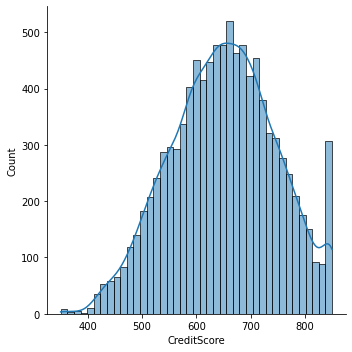

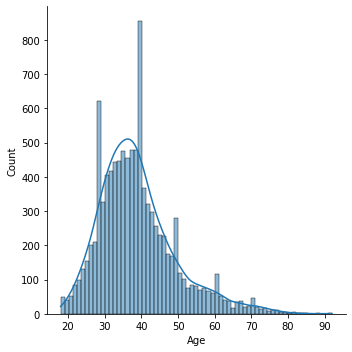

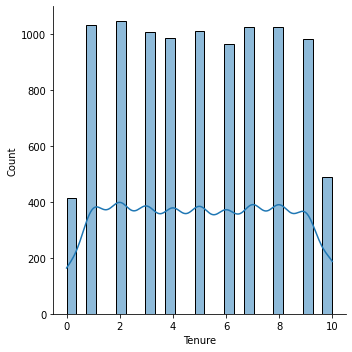

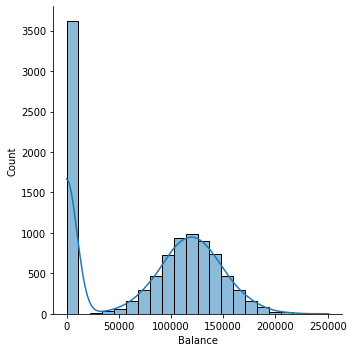

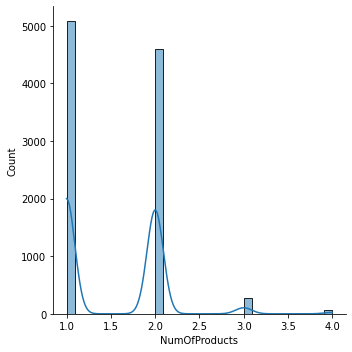

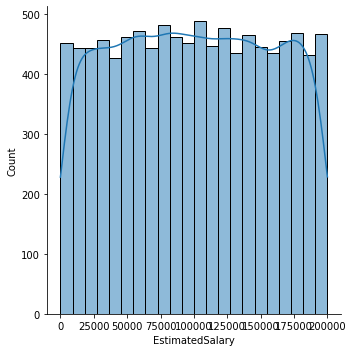

In [12]:
for i in l:
    sns.displot(data=data[i],kde=True)

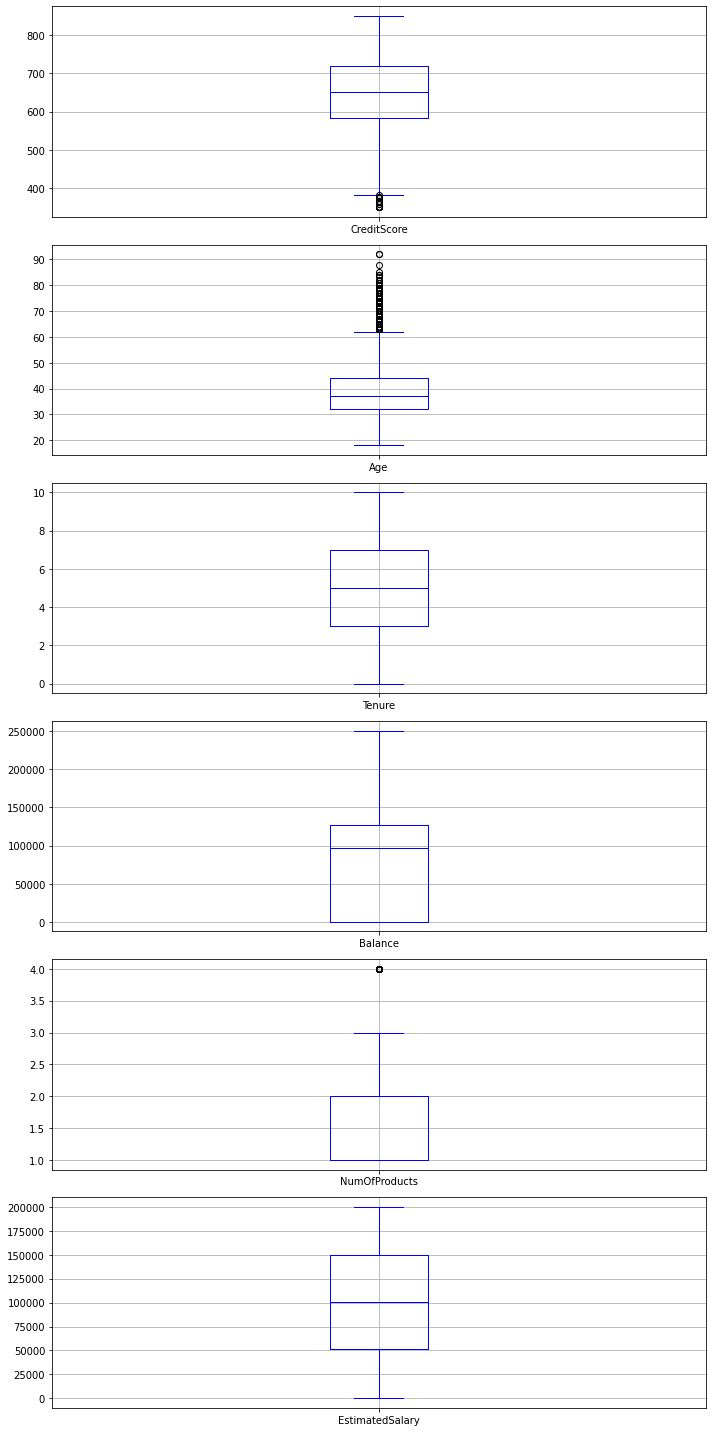

In [13]:
l=['CreditScore','Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, ncols=1, figsize=(10,20))
data.boxplot(column=[l[0]],grid='False',color='blue',ax=ax1)
data.boxplot(column=[l[1]],grid='False',color='blue',ax = ax2)
data.boxplot(column=[l[2]],grid='False',color='blue',ax = ax3)
data.boxplot(column=[l[3]],grid='False',color='blue',ax = ax4)
data.boxplot(column=[l[4]],grid='False',color='blue',ax = ax5)
data.boxplot(column=[l[5]],grid='False',color='blue',ax = ax6)
plt.tight_layout()

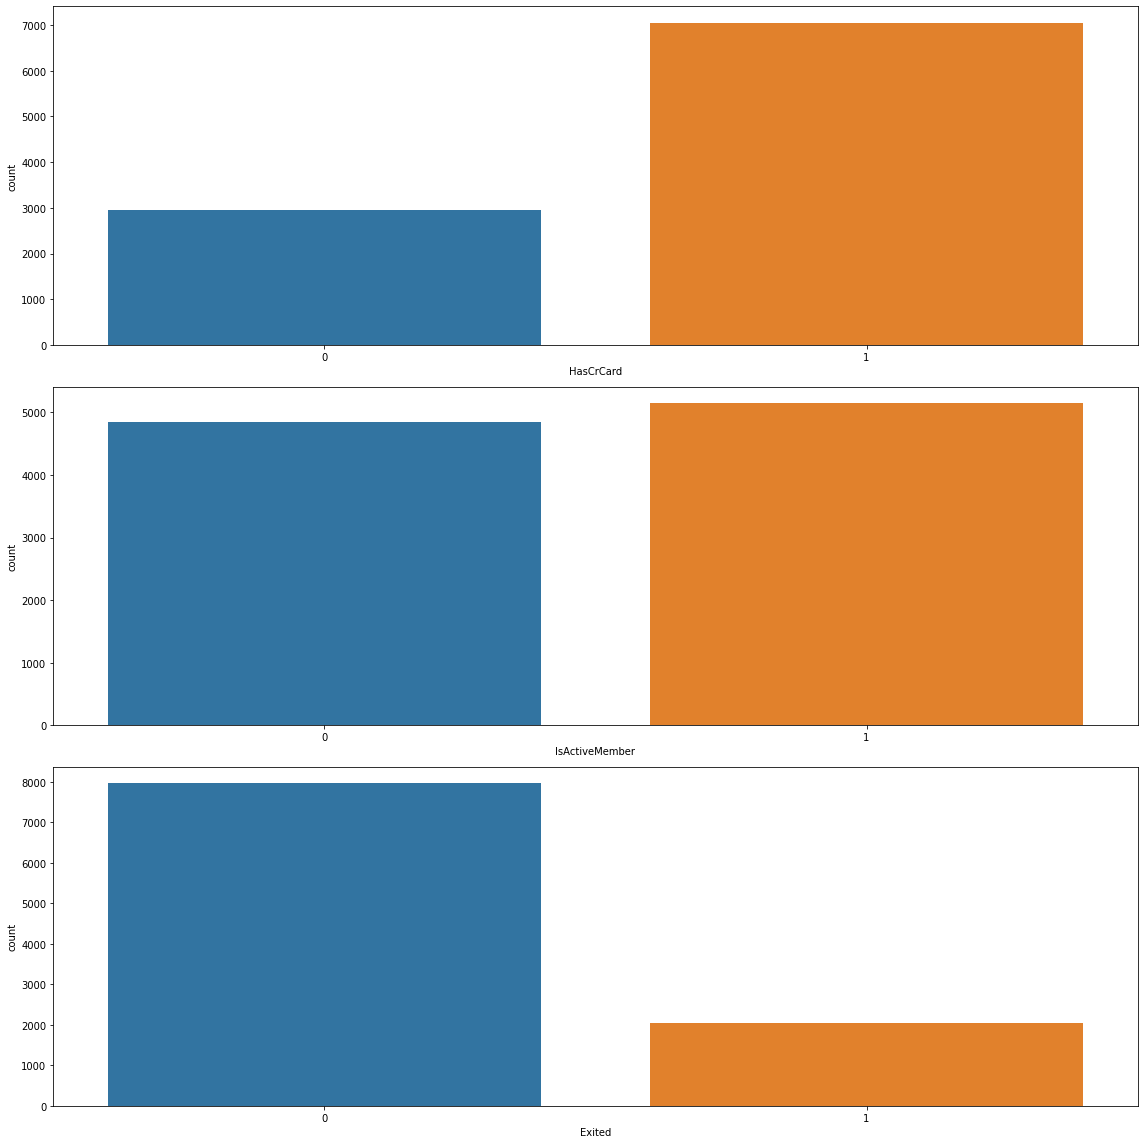

In [15]:
import warnings
warnings.filterwarnings("ignore")
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(16,16))
sns.countplot(data.HasCrCard,ax=ax1)
sns.countplot(data.IsActiveMember,ax=ax2)
sns.countplot(data.Exited,ax=ax3)
plt.tight_layout()

# BI - VARIATE ANALYSIS

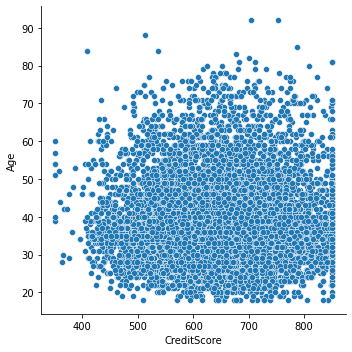

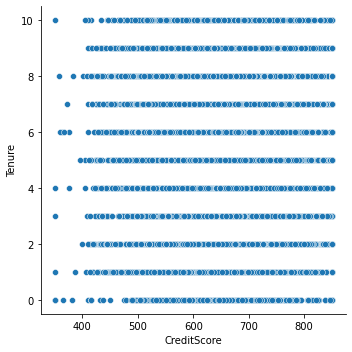

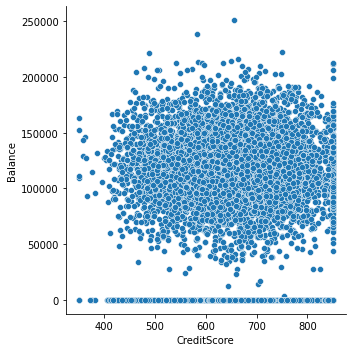

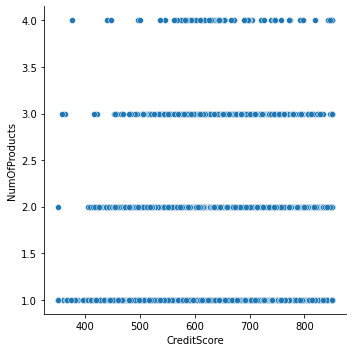

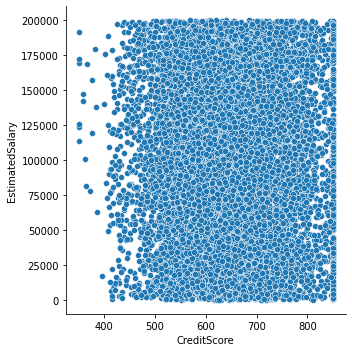

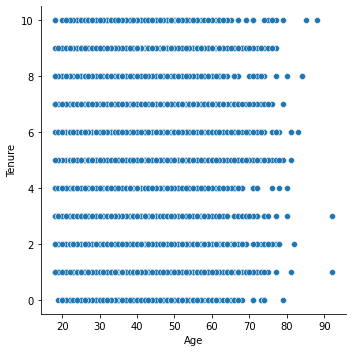

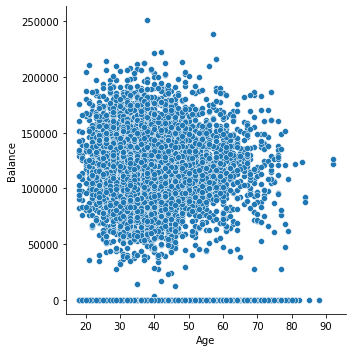

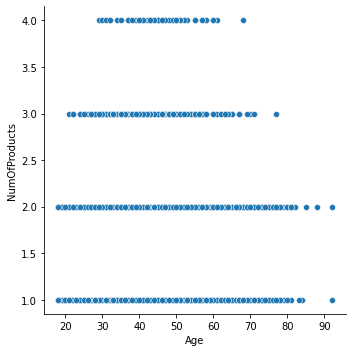

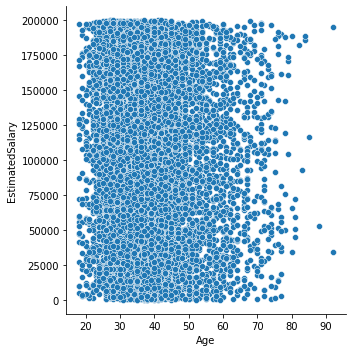

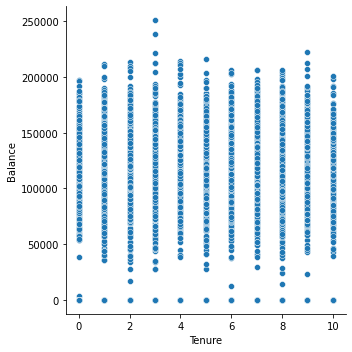

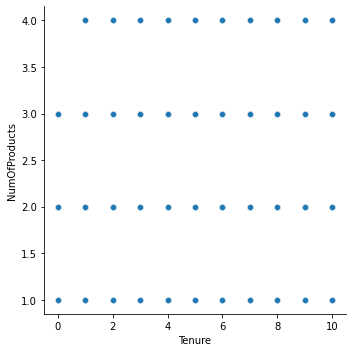

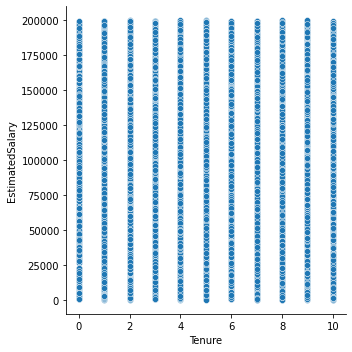

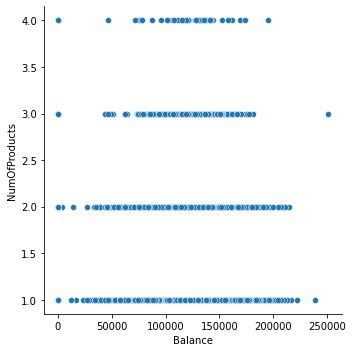

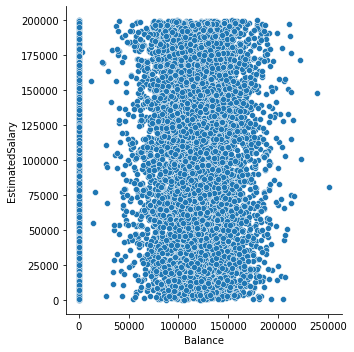

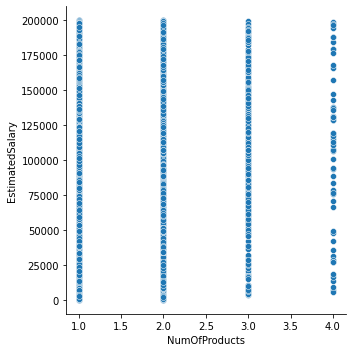

In [16]:
for i in range(len(l)-1):
    for j in range(i+1,len(l)):
        sns.relplot(x = l[i],y = l[j],data = data)

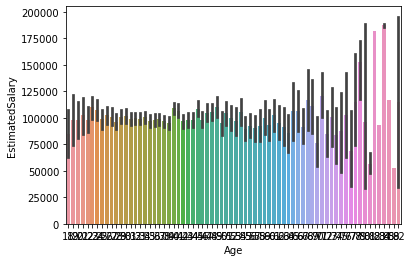

In [17]:
sns.barplot(x='Age',y='EstimatedSalary',data=data)

#  MULTI - VARIATE ANALYSIS

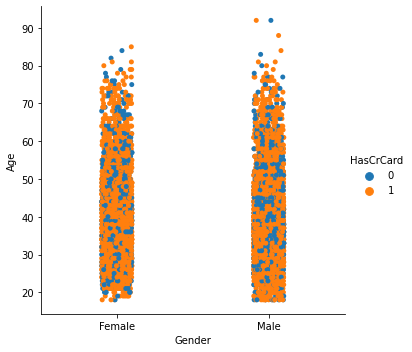

In [18]:
sns.catplot(x='Gender', y='Age', hue='HasCrCard', data=data)

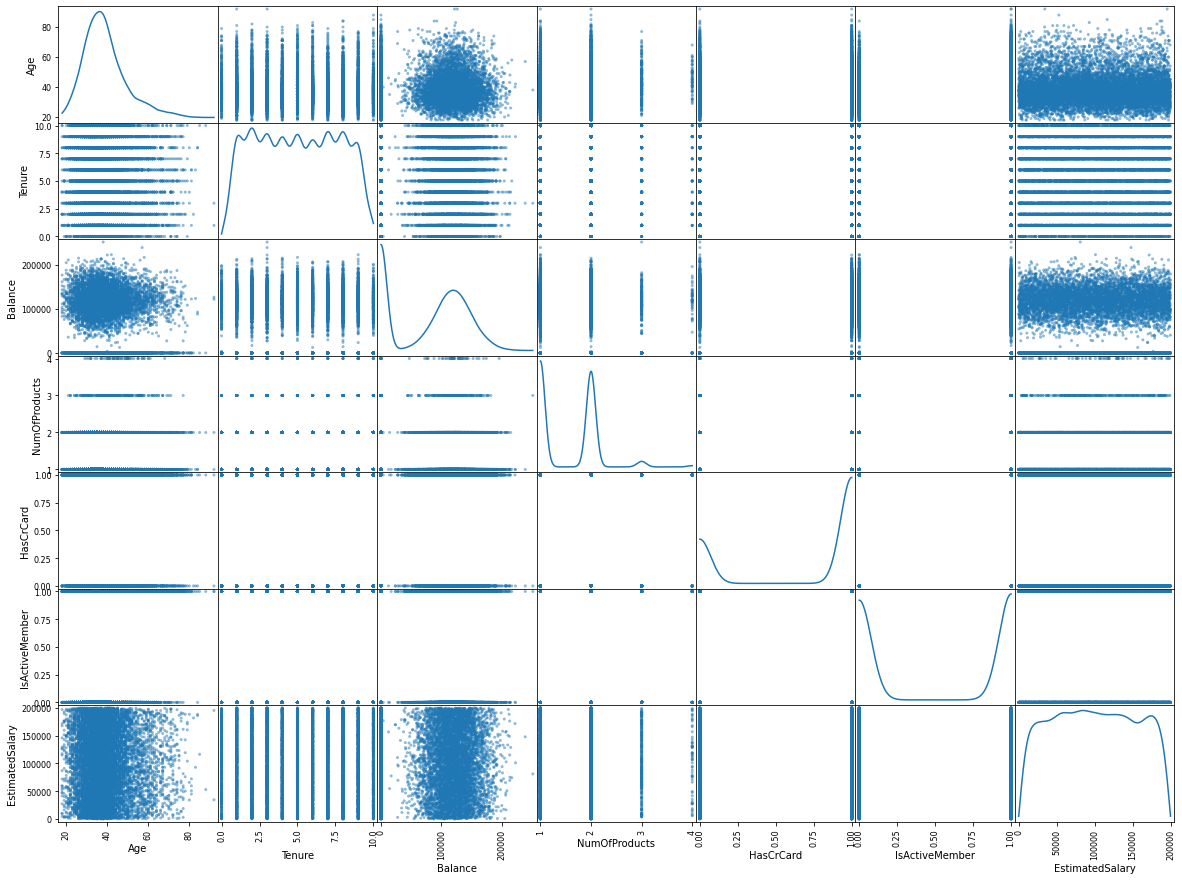

In [19]:
pd.plotting.scatter_matrix(data.loc[:,'Age':'EstimatedSalary'],diagonal='kde',figsize=(20,15))
plt.show()

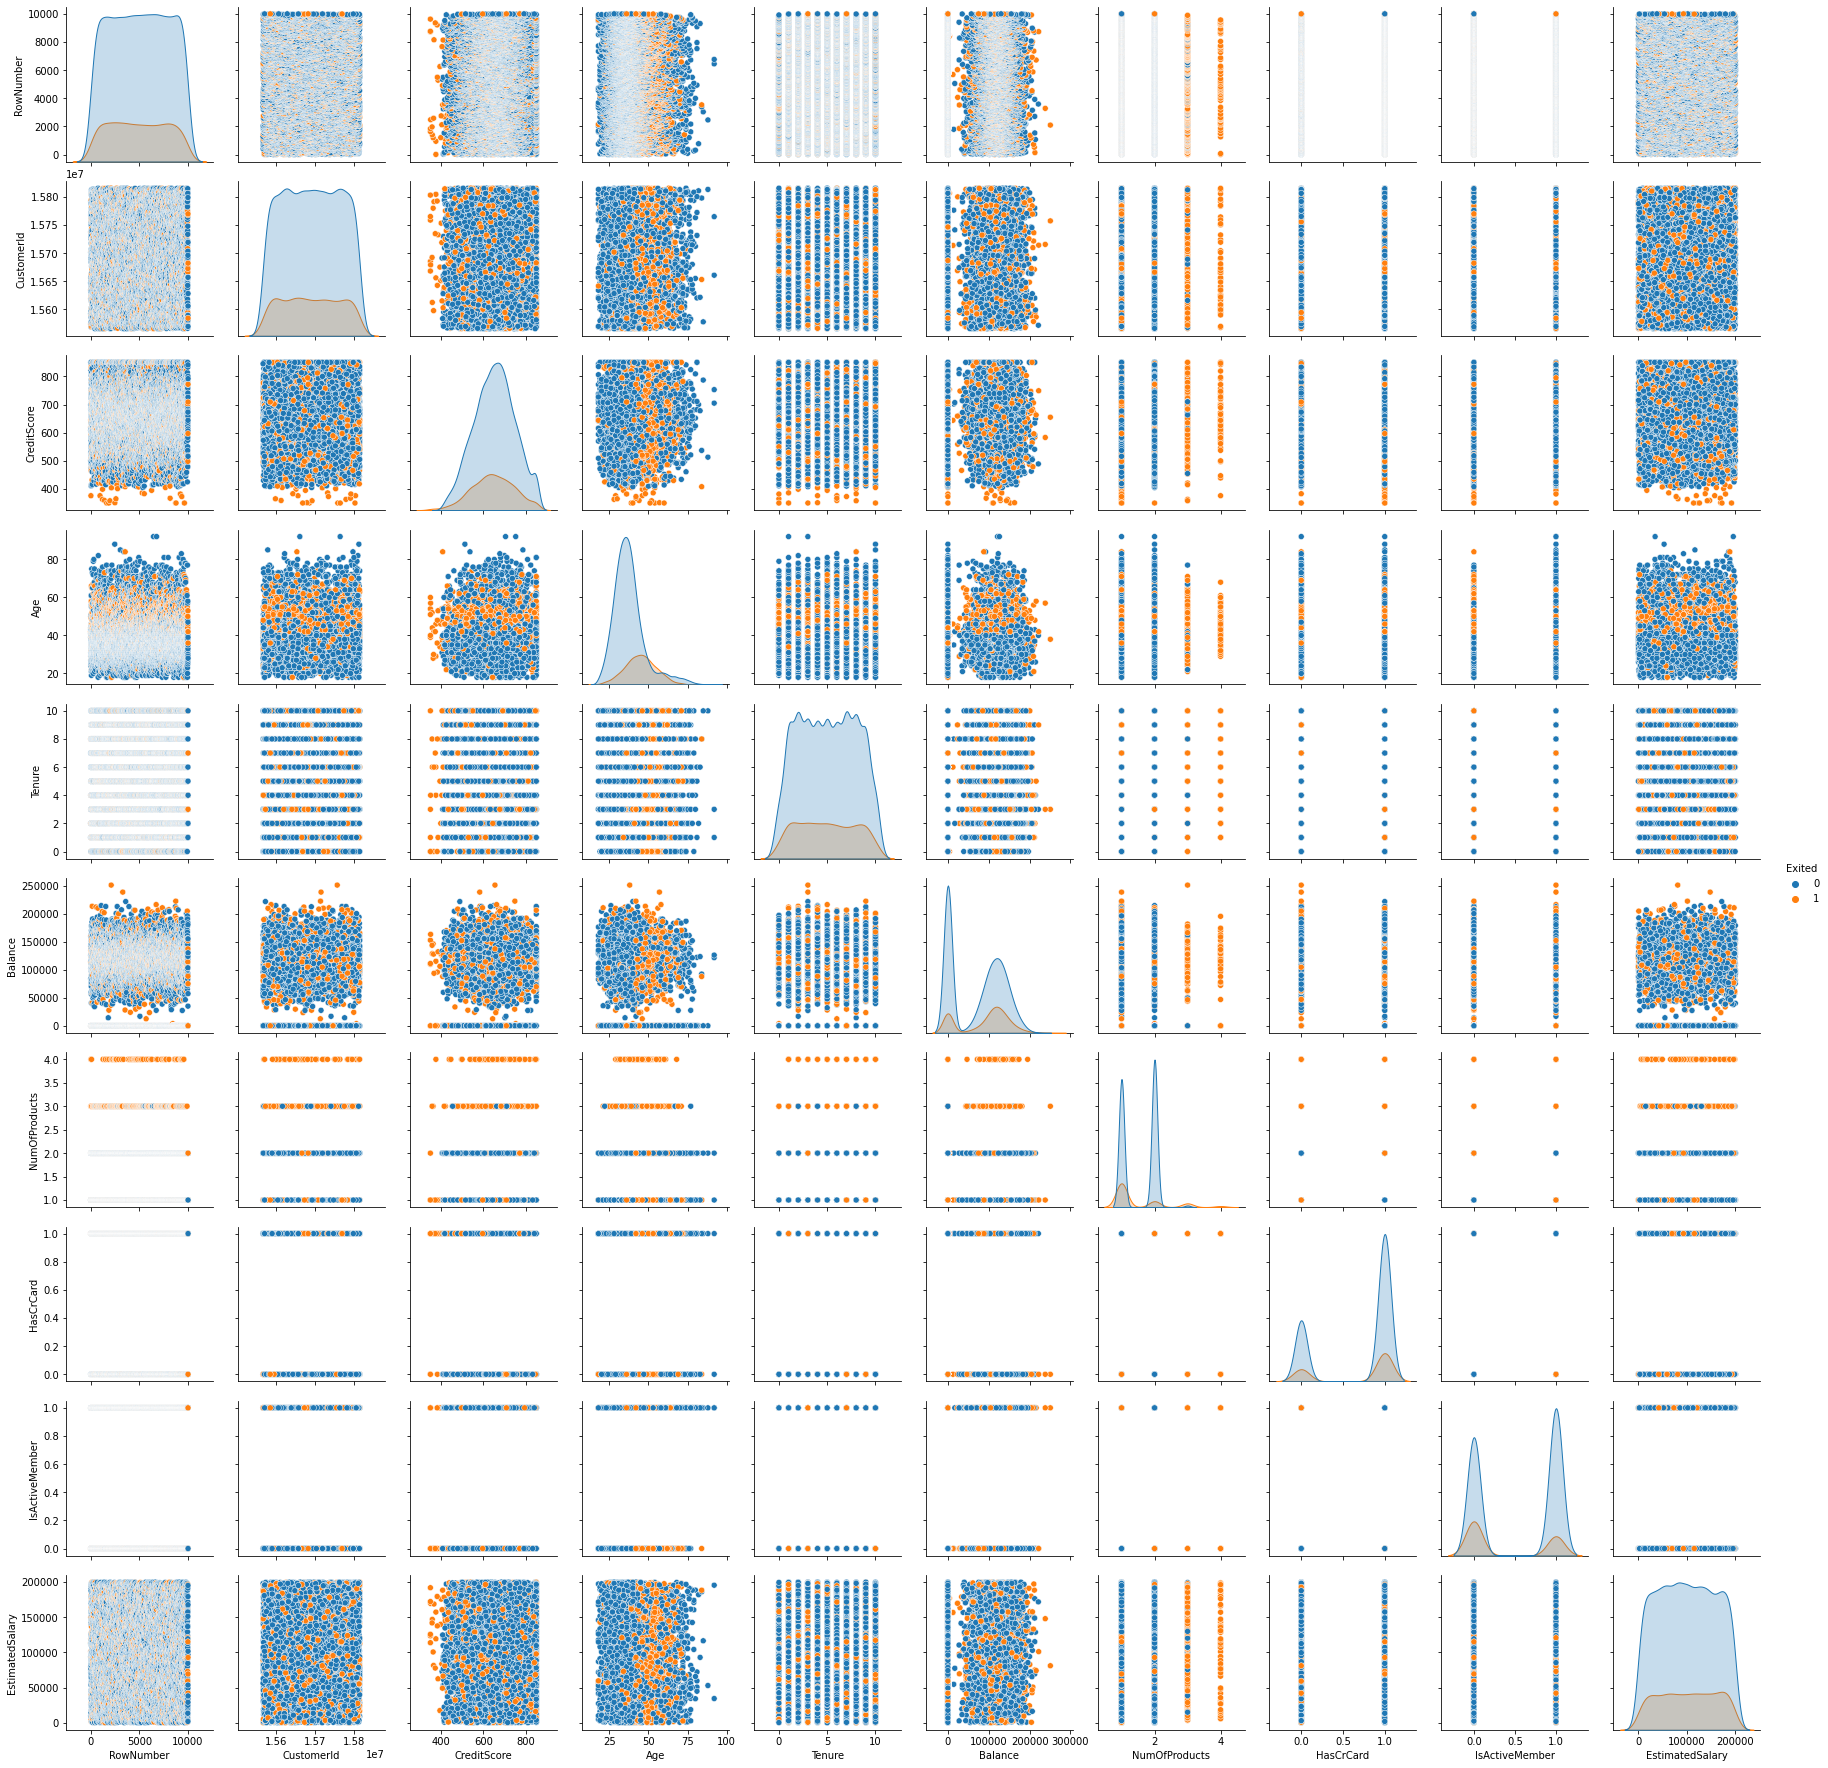

In [20]:
sns.pairplot(data = data,hue='Exited')

#  Perform descriptive statistics on the dataset

In [21]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Handle the Missing values.

In [24]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [25]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#  Find the outliers and replace the outliers

In [26]:
data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [27]:
data['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [28]:
data['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

0       38.9218
1       38.9218
2       38.9218
3       39.0000
4       38.9218
         ...   
9995    39.0000
9996    35.0000
9997    36.0000
9998    38.9218
9999    28.0000
Name: Age, Length: 10000, dtype: float64

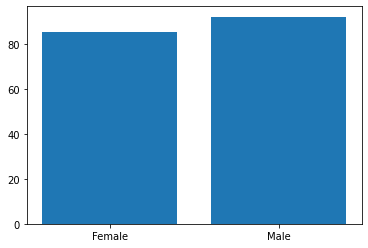

In [29]:
plt.bar(data['Gender'],data['Age'])
data1=data
mean=data1['Age'].mean()
data1['Age']=np.where(data1['Age']>40,mean,data1['Age'])
data1['Age']

In [30]:
l=['Balance','Age','CreditScore']
for i in l:
    percentile_least = data[i].quantile(0.1)
    percentile90 = data[i].quantile(0.9)
    data = data[(data[i]<percentile90)& (data[i]>percentile_least)]

In [31]:
data['CreditScore'].describe()

count    1812.000000
mean      652.945364
std        66.850268
min       524.000000
25%       600.750000
50%       655.000000
75%       705.000000
max       779.000000
Name: CreditScore, dtype: float64

#  Check for Categorical columns and perform encoding.

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in data:
    if data[i].dtype=='object':
        data[i]=encoder.fit_transform(data[i])

In [33]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
10,11,15767821,75,528,0,1,31.0,6,102016.72,2,0,0,80181.12,0
26,27,15736816,1096,756,1,1,36.0,2,136815.64,1,1,1,170041.95,0
31,32,15706552,741,533,0,1,36.0,7,85311.70,1,0,1,156731.91,0
45,46,15754849,997,776,1,0,32.0,4,109421.13,2,1,1,126517.46,0
48,49,15766205,1093,550,1,1,38.0,2,103391.38,1,0,1,90878.13,0


In [34]:
data['Gender']=data['Gender'].replace(['Male','Female'],[0,1])
le=LabelEncoder()
data['Geography']=le.fit_transform(data['Geography'])
data['Surname']=le.fit_transform(data['Surname'])
Geography=pd.get_dummies(data['Geography'],prefix='Country')
Geography
data2=data.join(Geography)
data2

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_0,Country_1,Country_2
10,11,15767821,75,528,0,1,31.0,6,102016.72,2,0,0,80181.12,0,1,0,0
26,27,15736816,1096,756,1,1,36.0,2,136815.64,1,1,1,170041.95,0,0,1,0
31,32,15706552,741,533,0,1,36.0,7,85311.70,1,0,1,156731.91,0,1,0,0
45,46,15754849,997,776,1,0,32.0,4,109421.13,2,1,1,126517.46,0,0,1,0
48,49,15766205,1093,550,1,1,38.0,2,103391.38,1,0,1,90878.13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,9977,15656062,52,637,0,0,33.0,7,103377.81,1,1,0,84419.78,0,1,0,0
9980,9981,15719276,953,741,2,1,35.0,6,74371.49,1,0,0,99595.67,0,0,0,1
9984,9985,15696175,289,602,1,1,35.0,7,90602.42,2,1,1,51695.41,0,0,1,0
9985,9986,15586914,710,659,0,1,36.0,6,123841.49,2,1,0,96833.00,0,1,0,0


#  Split the data into dependent and independent variables.

In [35]:
data.shape

(1812, 14)

In [36]:
x = data.iloc[:,:13]
y = data.iloc[:,13]

In [37]:
y.head()

10    0
26    0
31    0
45    0
48    0
Name: Exited, dtype: int64

In [38]:
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
10,11,15767821,75,528,0,1,31.0,6,102016.72,2,0,0,80181.12
26,27,15736816,1096,756,1,1,36.0,2,136815.64,1,1,1,170041.95
31,32,15706552,741,533,0,1,36.0,7,85311.70,1,0,1,156731.91
45,46,15754849,997,776,1,0,32.0,4,109421.13,2,1,1,126517.46
48,49,15766205,1093,550,1,1,38.0,2,103391.38,1,0,1,90878.13


In [39]:
y=data.iloc[:,6:14]
y

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
10,31.0,6,102016.72,2,0,0,80181.12,0
26,36.0,2,136815.64,1,1,1,170041.95,0
31,36.0,7,85311.70,1,0,1,156731.91,0
45,32.0,4,109421.13,2,1,1,126517.46,0
48,38.0,2,103391.38,1,0,1,90878.13,0
...,...,...,...,...,...,...,...,...
9976,33.0,7,103377.81,1,1,0,84419.78,0
9980,35.0,6,74371.49,1,0,0,99595.67,0
9984,35.0,7,90602.42,2,1,1,51695.41,0
9985,36.0,6,123841.49,2,1,0,96833.00,0


#  Scale the independent variables

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [50]:
df[["ScaledBalance"]] = scaler.fit_transform(df[["Balance"]])

In [51]:
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

#  Split the data into training and testing

In [52]:
from sklearn.model_selection import train_test_split


In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [54]:
x_train.shape

(1449, 13)

In [55]:
y_train.shape

(1449, 8)

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=11)
xtrain
ytrain
xtest
ytest

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3992,38.0,0,38848.19,2,0,0,94003.11,0
1126,33.0,8,122528.18,1,1,0,196260.30,0
5375,38.0,7,111484.88,1,1,1,76076.20,0
8440,33.0,8,96769.04,1,1,1,36864.05,0
9787,32.0,7,64082.09,1,0,1,109159.58,0
...,...,...,...,...,...,...,...,...
8291,38.0,1,147904.31,1,1,1,69370.05,0
7154,33.0,9,128152.82,1,0,0,147822.81,0
374,35.0,7,58469.37,2,1,1,172459.39,0
3456,33.0,6,94598.48,1,0,0,197519.66,1
